Thesis: # of games played is the best way to predict/prevent ACL injuries for college basketball players


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Imports downloaded athlete dataset from this link (https://www.kaggle.com/datasets/ziya07/athlete-injury-and-performance-dataset?resource=download)
file_path = r"C:\Users\Jackson Boyle\OneDrive\County Executive\Attachments\Documents\Spring 2025\Data Science 325\Boyle_ACLinjuries\athlete_dataset\collegiate_athlete_injury_dataset.csv"

# Loads the dataset into a dataframe
df = pd.read_csv(file_path)

print(df.head())
print(df.columns)


  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1                     2   

   Rest_Between_Events_Days  Fatigue_Score  Performance_Score 

In [56]:
# identifies the target and predicting variables while getting rid of those that would not be helpful or can't be controlled (Age, height, etc.)
y = df['Injury_Indicator']
X = df.drop(columns=['Injury_Indicator', 'Gender', 'Age', 'Height_cm', 'Weight_kg', 'Position', 'Athlete_ID', 'ACL_Risk_Score', 'Fatigue_Score', 'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score'])
X_scores = df[['Fatigue_Score', 'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score']]

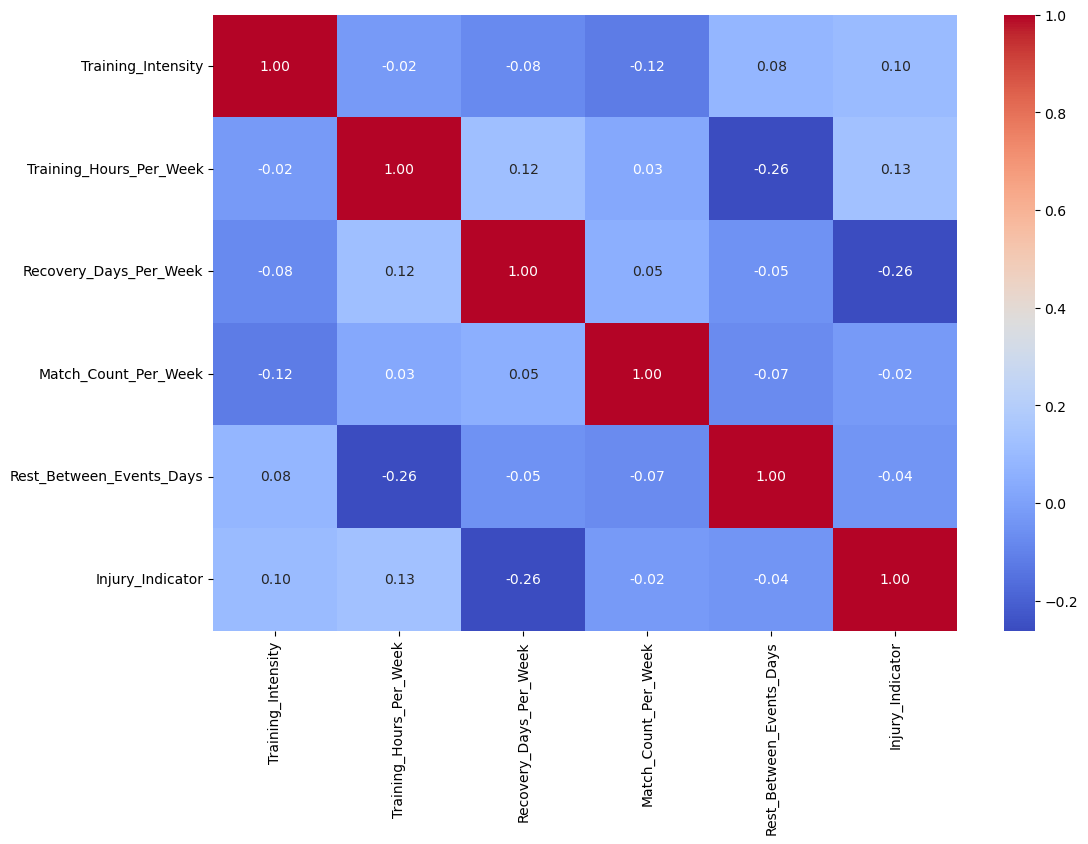

In [57]:
X_df = pd.DataFrame(X)

# Used Copilot to fix this part of the code
xy_df = pd.concat([X_df, y.reset_index(drop=True)], axis=1)
# test for which features are most correlated with the target variable
corr = xy_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


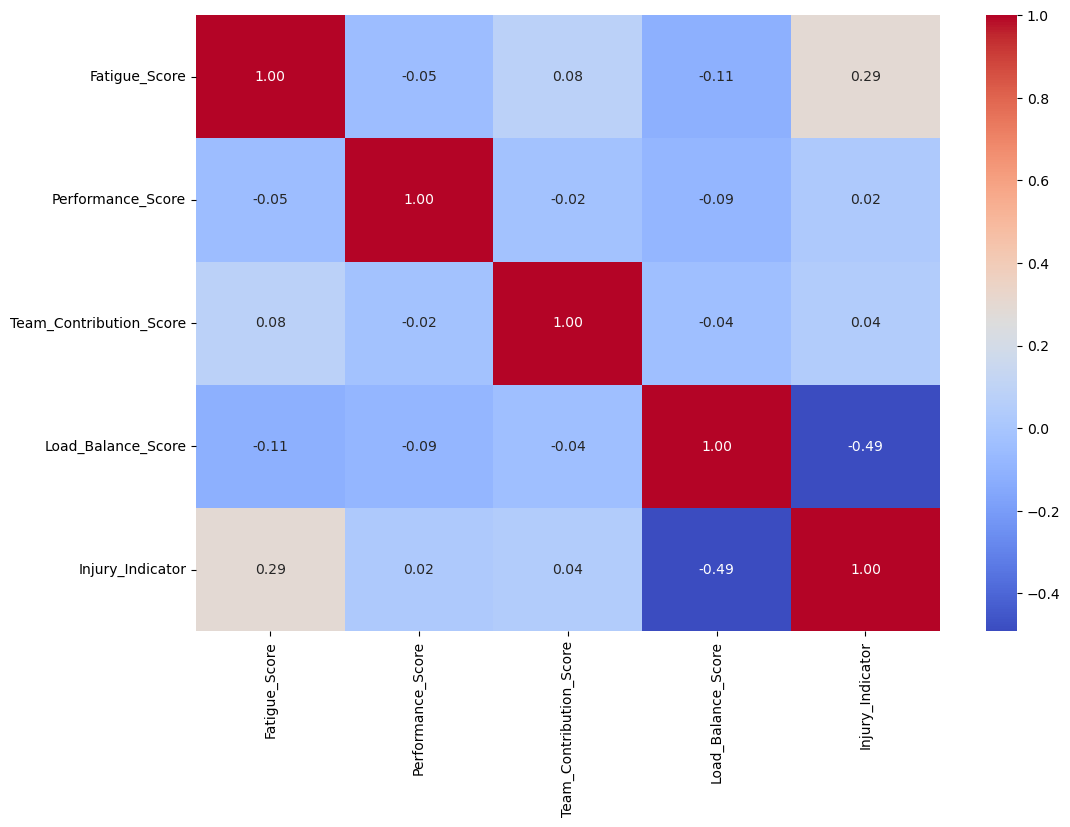

In [58]:
X_scores_df = pd.DataFrame(X_scores)

xy_scores_df = pd.concat([X_scores_df, y.reset_index(drop=True)], axis=1)
# test for which features are most correlated with the target variable
corr = xy_scores_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [59]:
X_selected = df[['Recovery_Days_Per_Week', 'Fatigue_Score', 'Load_Balance_Score']]
# chooses the features that are most correlated with the target variable, injury indicator

In [60]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=21)

Decision Tree
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       149
           1       1.00      0.55      0.71        11

    accuracy                           0.97       160
   macro avg       0.98      0.77      0.84       160
weighted avg       0.97      0.97      0.96       160

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.50      0.33      0.40         3

    accuracy                           0.93        40
   macro avg       0.72      0.65      0.68        40
weighted avg       0.91      0.93      0.92        40



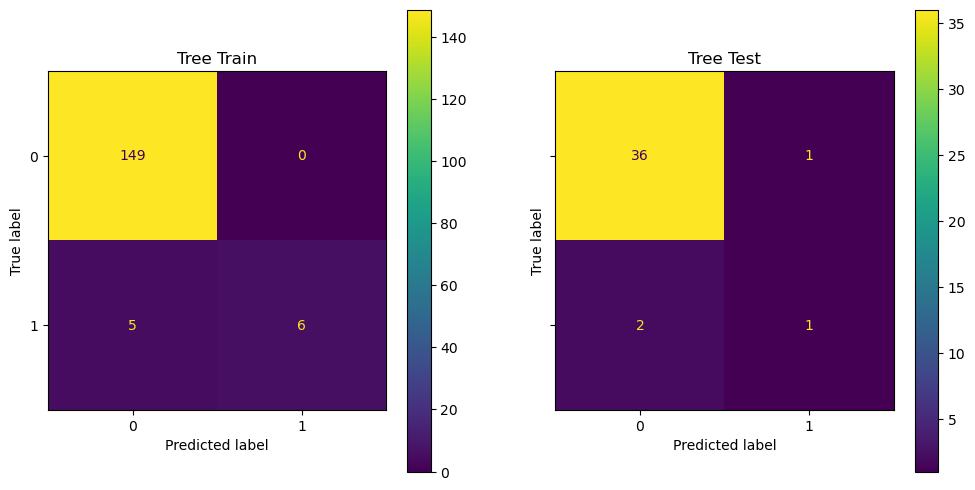

In [61]:
# runs a decision tree model ro predict injury indicator
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
y_tree_train = tree_clf.predict(X_train)
y_tree_test  = tree_clf.predict(X_test)

# prints the results of the decision tree model
print("Decision Tree")
print(classification_report(y_train, y_tree_train))
print(classification_report(y_test,  y_tree_test))

# creates and plots confusion matrices for the decision tree model
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, ax=axes[0])
axes[0].set_title("Tree Train")
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,   ax=axes[1])
axes[1].set_title("Tree Test")
plt.show()

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.75      0.55      0.63        11

    accuracy                           0.96       160
   macro avg       0.86      0.77      0.80       160
weighted avg       0.95      0.96      0.95       160

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.50      0.67      0.57         3

    accuracy                           0.93        40
   macro avg       0.74      0.81      0.77        40
weighted avg       0.94      0.93      0.93        40



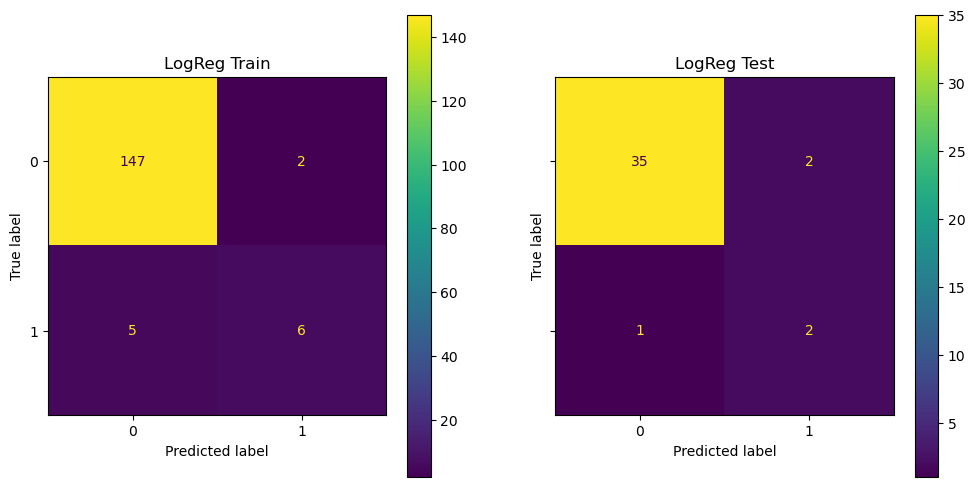

In [62]:
# runs a logostic regression model to predict injury indicator
logreg = LogisticRegressionCV(max_iter=1000)
logreg.fit(X_train, y_train)
y_log_train = logreg.predict(X_train)
y_log_test  = logreg.predict(X_test)

# prints the results of the logistic regression model
print("Logistic Regression")
print(classification_report(y_train, y_log_train))
print(classification_report(y_test,  y_log_test))

# creates and plots confusion matrices for the logistic regression model
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_log_train, ax=axes[0])
axes[0].set_title("LogReg Train")
ConfusionMatrixDisplay.from_predictions(y_test,  y_log_test,   ax=axes[1])
axes[1].set_title("LogReg Test")
plt.show()